<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 
Author: Arina Lopukhova (@erynn). Edited by [Yury Kashnitskiy](https://yorko.github.io) (@yorko). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

<h1><center>Assignment #1. Fall 2018</center></h1>
<h2><center>Exploratory data analysis of Olympic games with Pandas</center></h2>

__There are ten questions about [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/version/2) dataset in this task. Your task is to fill in the missing Python code and choose answers in [this web-form](https://docs.google.com/forms/d/179HYvlF_0x435CWdu2aOtR9a3flh0YCQXXNXhXaKw2M).__

Download the file `athlete_events.csv` from [Kaggle page](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). The dataset has the following features (copied from Kaggle):

- __ID__ - Unique number for each athlete
- __Name__ - Athlete's name
- __Sex__ - M or F
- __Age__ - Integer
- __Height__ - In centimeters
- __Weight__ - In kilograms
- __Team__ - Team name
- __NOC__ - National Olympic Committee 3-letter code
- __Games__ - Year and season
- __Year__ - Integer
- __Season__ - Summer or Winter
- __City__ - Host city
- __Sport__ - Sport
- __Event__ - Event
- __Medal__ - Gold, Silver, Bronze, or NA

In [1]:
import pandas as pd

In [2]:
# Change the path to the dataset file if needed. 
PATH = 'athlete_events.csv'

In [3]:
data = pd.read_csv(PATH)
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


__1. How old were the youngest male and female participants of the 1996 Olympics?__

- 16 and 15
- 14 and 12 
- 16 and 12
- 13 and 11

In [4]:
# You code here 
data[data['Year']==1996].groupby('Sex')['Age'].min()

Sex
F    12.0
M    14.0
Name: Age, dtype: float64

__2. What was the percentage of male gymnasts among all the male participants of the 2000 Olympics? Round the answer to the first decimal.__

*Hint:* here and further if needed drop duplicated sportsmen to count only unique ones. 

- 0.2
- 1.5 
- 2.5
- 7.7

In [5]:
# You code here
data_2000 = data[(data['Year']==2000) & (data['Sex']=='M')]
perscentage_male_gymnasts = data_2000[data_2000['Sport']=='Gymnastics']['ID'].count() / data_2000['ID'].count() * 100
print(perscentage_male_gymnasts)

7.651966626936829


__3. What are the mean and standard deviation of height for female basketball players participated in the 2000 Olympics? Round the answer to the first decimal.__

- 178.5 and 7.2
- 179.4 and 10
- 180.7 and 6.7
- 182.4 and 9.1 

In [6]:
# You code here 
data2000F_Basketball = data[(data['Year']==2000) & (data['Sex']=='F') & (data['Sport']=='Basketball')]
data2000F_Basketball['Height'].describe()

count    142.000000
mean     182.387324
std        9.139462
min      162.000000
25%      175.000000
50%      182.000000
75%      190.000000
max      213.000000
Name: Height, dtype: float64

__4. Find a sportsperson participated in the 2002 Olympics, with the highest weight among other participants of the same Olympics. What sport did he or she do?__

- Judo
- Bobsleigh 
- Weightlifting
- Boxing

In [7]:
# You code here 
data[data['Year']==2002].sort_values(by=['Weight'], ascending=False).head(1)['Sport']


99154    Bobsleigh
Name: Sport, dtype: object

__5. How many times did Pawe Abratkiewicz participate in the Olympics held in different years?__

- 0
- 1 
- 2
- 3 

In [8]:
# You code here 
data[data['Name']=='Pawe Abratkiewicz']['Year'].drop_duplicates().count()

3

__6. How many silver medals in tennis did Australia win at the 2000 Olympics?__

- 0
- 1 
- 2 
- 3 

In [14]:
# You code here 
data[(data['Year']==2000) & (data['NOC']=='AUS') & (data['Medal']=='Silver') & data2['Event'].str.contains('Tennis')]['ID'].count()

2

__7. Is it true that Switzerland won fewer medals than Serbia at the 2016 Olympics? Do not consider NaN values in _Medal_ column.__ 

- Yes 
- No

In [28]:
# You code here 
data[(data['Year']==2016) & (data['NOC']=='SWI')]['ID'].count() < data[(data['Year']==2016) & (data['NOC']=='SER')]['ID'].count()

False

__8. What age category did the fewest and the most participants of the 2014 Olympics belong to?__
- [45-55] and [25-35) correspondingly
- [45-55] and [15-25) correspondingly
- [35-45] and [25-35) correspondingly
- [45-55] and [35-45) correspondingly

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012A88C18>]],
      dtype=object)

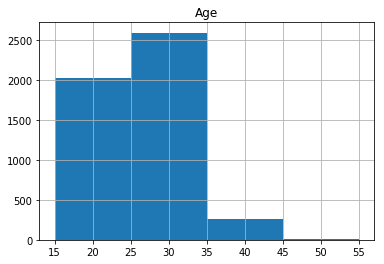

In [19]:
# You code here 
data[data['Year']==2014].hist(column='Age',bins=4)

__9. Is it true that there were Summer Olympics held in Lake Placid? Is it true that there were Winter Olympics held in Sankt Moritz?__

- Yes, Yes
- Yes, No
- No, Yes 
- No, No 

In [32]:
# You code here 
data[(data['Season']=='Summer') & (data['City']=='Lake Placid')]['ID'].count()

data[(data['Season']=='Winter') & (data['City']=='Sankt Moritz')]['ID'].count()

0

__10. What is the absolute difference between the number of unique sports at the 1995 Olympics and 2016 Olympics?__

- 16
- 24
- 26
- 34

In [45]:
# There is't Olympics data in 1995!
data[data['Year']==2016]['Event'].drop_duplicates().count() - data[data['Year']==1996]['Event'].drop_duplicates().count()

35